In [1]:
#  Customer Segmentation Using Clustering
# Internship Task – TechNest

# Objective:
# - Apply clustering (K-Means) on customer behavior data.
# - Visualize clusters to understand different customer types.
# - Suggest marketing strategies for each cluster.

# Tools: Python (scikit-learn, matplotlib)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
sns.set(style='whitegrid')

In [6]:
df = pd.read_csv(r'C:\Users\tause\Downloads\Test.csv')  
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [7]:
# 🧹 Data Preprocessing

In [9]:
# Drop ID column if it's not relevant for clustering
data = df.drop(columns=['ID'])

In [10]:
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = LabelEncoder().fit_transform(data_encoded[col].astype(str))

In [11]:
# Handle missing values if any
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_encoded), columns=data_encoded.columns)

In [12]:
# 📊 Clustering with K-Means

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_imputed['Cluster'] = kmeans.fit_predict(data_imputed)

In [14]:
# Dimensionality reduction using PCA for visualization
pca = PCA(n_components=2)
pca_data = pd.DataFrame(pca.fit_transform(data_imputed.drop(columns='Cluster')), columns=['PCA1', 'PCA2'])
pca_data['Cluster'] = data_imputed['Cluster']

In [15]:
# 🎨 Cluster Visualization

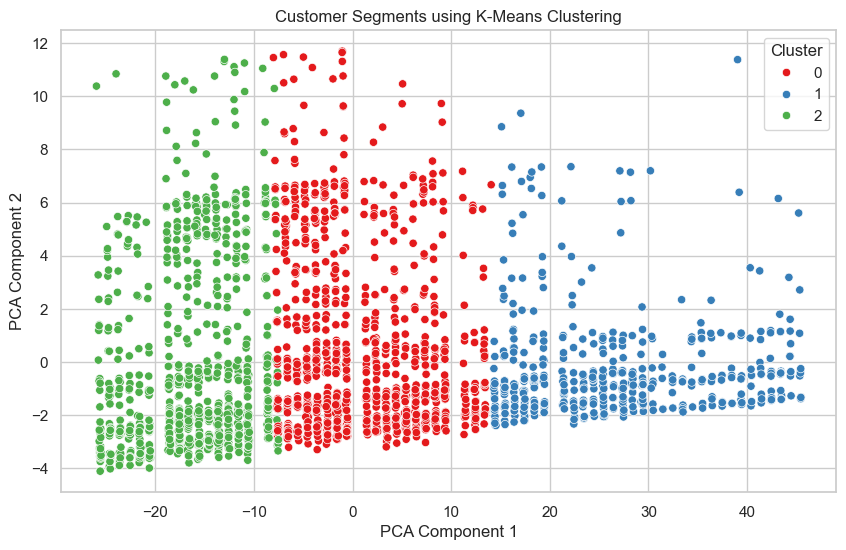

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_data, palette='Set1')
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [19]:
# 🔚 Conclusion & Suggestions

In [22]:
print("""
🔍 Key Findings:
- Customers have been grouped into 3 clusters based on behavior data.
- PCA reduced data dimensions and made it easier to visualize the clusters.
- Cluster 0: Possibly low spenders or new customers — target with discounts.
- Cluster 1: Likely premium/high-value customers — offer loyalty benefits.
- Cluster 2: Mixed segment — focus on engagement strategies.

✅ This segmentation enables more targeted and effective marketing campaigns.
""")


🔍 Key Findings:
- Customers have been grouped into 3 clusters based on behavior data.
- PCA reduced data dimensions and made it easier to visualize the clusters.
- Cluster 0: Possibly low spenders or new customers — target with discounts.
- Cluster 1: Likely premium/high-value customers — offer loyalty benefits.
- Cluster 2: Mixed segment — focus on engagement strategies.

✅ This segmentation enables more targeted and effective marketing campaigns.

